In [1]:
import sys
sys.path.append('/NDDepth/src')

In [2]:
from PIL import Image
import torch
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
from model import Model, ModelConfig
from dataloader import ImageDataset, preprocess_transform

torch.manual_seed(42)

train_dataset = ImageDataset('/scratchdata/nyu_data', '/scratchdata/nyu_data/data/nyu2_train.csv', transform=preprocess_transform)
train_dataloader = DataLoader(train_dataset, batch_size=1, shuffle=True)

In [3]:
config =  ModelConfig("tiny07")
model = Model(config).to("cuda")

/usr/local/lib/python3.10/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [6]:
# Get an output from dataloader
for i, x in enumerate(train_dataloader):   
    
    for k in x.keys():
        x[k] = x[k].to("cuda")
        
    d1, d2 = model(x)
    break

torch.Size([1, 1, 120, 160])


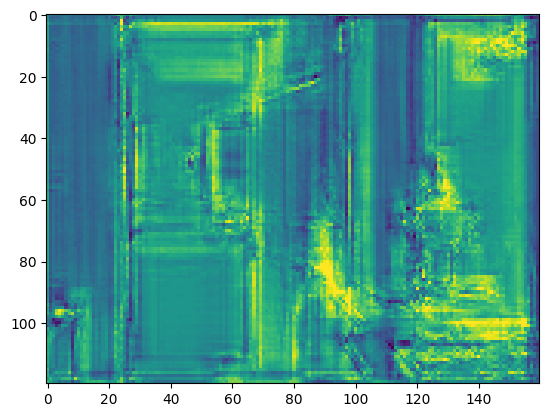

In [7]:
print(d1[-1].shape)
plt.imshow(d1[-1][0, 0].detach().cpu().numpy())